In [3]:
import pandas as pd
import json
from tqdm import tqdm
import pickle

# Dictionary

## thai dictionary

In [7]:
# Opening JSON file 
thai_dictionary = []
with open('./Yaitron-master/data/yaitron.ndjson', 'r', encoding='utf-8') as file:
    while True:
        line = file.readline()
        if line:
            thai_dictionary.append(json.loads(line))
        else:
            break

In [34]:
df = pd.DataFrame(thai_dictionary)

In [35]:
df.lang.value_counts()

en    83232
th    40850
Name: lang, dtype: int64

In [36]:
df_thai_dic = df.loc[:40850 - 1]

In [37]:
df_thai_dic.tail()

,pos,synonyms,entry_id,examples,translation,classifiers,lang,notes,similar_translations,antonyms,definitions,headword
40845,v,[แอบมอง],40846,[หล่อนแอบดูเขามานานแล้ว],"{'lang': 'en', 'text': 'peep at'}",[],th,[],"[{'lang': 'en', 'text': 'peek at; steal a glan...",[],[],แอบดู
40846,v,[แอบดู],40847,[เขายังคงเฝ้าแอบมองเธอจากห้องมืดยามค่ำคืน],"{'lang': 'en', 'text': 'peep at'}",[],th,[],"[{'lang': 'en', 'text': 'peek/peep at; steal a...",[],[],แอบมอง
40847,n,[ตุ่ม],40848,[อำเภอหนองหานและอำเภอบ้านเชียงจังหวัดอุดรธานีม...,"{'lang': 'en', 'text': 'big earthen jar (usual...",[],th,[],"[{'lang': 'en', 'text': 'big water jar; big wa...",[],[ภาชนะสำหรับขังน้ำ ก้นสอบเล็กน้อย ปากกว้าง],โอ่งน้ำ
40848,adj,"[ทันสมัย, ก้าวหน้า]",40849,[อาวุธนิวเคลียร์หรืออาวุธไฮเทคอื่นๆ ที่ติดตั้ง...,"{'lang': 'en', 'text': 'high-technology'}",[],th,[(อังกฤษ)],"[{'lang': 'en', 'text': 'high-tech; hi-tech'}]",[ล้าสมัย],[],ไฮเทค
40849,n,[ทางหลวง],40850,[เส้นทางที่รถยนต์วิ่งเป็นเส้นทางไฮเวย์ตลอดสายส...,"{'lang': 'en', 'text': 'highway'}",[],th,[(อังกฤษ)],[],[],[ทางคมนาคมสายสำคัญ],ไฮเวย์


## Very nice thai dic in my prog

In [30]:
# from pythainlp.corpus.wordnet import synsets
#     str(synsets("ทำงาน")[1]).strip("Synset(''))").split(".")[0]

In [8]:
from pythainlp.corpus.wordnet import synsets
import re

thai_dic = {}
for i in tqdm(thai_dictionary[:40850]):
    if i['headword'] not in thai_dictionary:
        thai_dic[i['headword']] = []
        thai_dic[i['headword']].append(i['translation']['text'])
        for _ in synsets(i['headword'], ):
            thai_dic[i['headword']].append(str(_).strip("Synset(''))").split(".")[0])
        if i['similar_translations']:
            thai_dic[i['headword']] = thai_dic[i['headword']] + i['similar_translations'][0]['text'].split(';')
    else:
        thai_dic[i['headword']].append(i['translation']['text'])
        if i['similar_translations']:
            thai_dic[i['headword']] = thai_dic[i['headword']] + i['similar_translations'][0]['text'].split(';')
        
    thai_dic[i['headword']] = list(set(thai_dic[i['headword']]))

100%|██████████| 40850/40850 [03:41<00:00, 184.41it/s]


In [9]:
len(thai_dic)

32347

## english dictionary

In [129]:
# Opening JSON file 
eng_dictionary = []
with open('./thesaurus-master/en_thesaurus.jsonl', 'r', encoding='utf-8') as file:
    # to combine synonym
    now_word = ''
    while True:
        line = file.readline()
        if line:
            eng_dictionary.append(json.loads(line))
        else:
            break

In [105]:
df_eng_dic = pd.DataFrame(eng_dictionary)

In [137]:
df_eng_dic

,word,key,pos,synonyms
0,14-Apr,14-Apr_1,noun,"[Pan American Day, 14-Apr]"
1,1-Aug,1-Aug_1,noun,"[Lammas Day, 1-Aug, Lammas]"
2,6-Aug,6-Aug_1,noun,"[6-Aug, Transfiguration, Transfiguration Day]"
3,15-Aug,15-Aug_1,noun,"[Assumption, 15-Aug, Assumption of Mary]"
4,a,a_1,noun,"[A, letter a]"
...,...,...,...,...
169004,zymolysis,zymolysis_1,noun,"[fermen, fermentation, zymosis, fermenting]"
169005,zymolytic,zymolytic_1,adj,"[zymotic, chemical action, chemical change, ch..."
169006,zymosis,zymosis_2,noun,"[fermen, zymolysis, fermentation, fermenting]"
169007,zymotic,zymotic_1,adj,[infection]


In [126]:
eng_dic['a']

['A', 'antiophthalmic factor', 'vitamin A', 'axerophthol']

## Very nice english dic in my prog

In [130]:
from nltk.corpus import wordnet

eng_dic = {}
for i in tqdm(eng_dictionary):
    now = i['word'].lower()
    #-------------Wordnet--------------
    synonyms = []
    for syn in wordnet.synsets(now):
        for l in syn.lemmas():
            synonyms.append(l.name().replace('_', ' '))
    #----------------------------------       
    if now in eng_dic:
        eng_dic[now] = eng_dic[now] + i['synonyms']
    else:
        eng_dic[now] = i['synonyms']
    eng_dic[now] = list(set(eng_dic[now] + synonyms))

100%|██████████| 169009/169009 [00:16<00:00, 10086.62it/s]


In [134]:
len(eng_dic)

125701

## save dictionary

In [10]:
# a_file = open("./dictionary/thai_dic.pkl", "wb")
# pickle.dump(thai_dic, a_file)
# a_file.close()

In [135]:
# a_file = open("./dictionary/english_dic.pkl", "wb")
# pickle.dump(eng_dic, a_file)
# a_file.close()

# Import Data & Dictionary

In [44]:
a_file = open("./dictionary/thai_dic.pkl", "rb")
thai_dic = pickle.load(a_file)

In [45]:
a_file = open("./dictionary/english_dic.pkl", "rb")
eng_dic = pickle.load(a_file)

## English token

In [1]:
eng_sen = []
with open('./data/english_token.txt', 'r', encoding = 'utf-8') as f:
     while True:
        line = f.readline()
        if line:
            eng_sen.append(line.split())
        else:
            break

In [4]:
a_file = open("./data/english_token.data", "wb")
pickle.dump(eng_sen, a_file)
a_file.close()

In [9]:
# eng_sen[0]

## No article english token

In [5]:
# eng_sen = []
# with open('./data/english_token_no_article.txt', 'r', encoding = 'utf-8') as f:
#      while True:
#         line = f.readline()
#         if line:
#             eng_sen.append(line.split())
#         else:
#             break

## English sent with ner

In [52]:
# with open('./data/eng_sent_stanfordNER.data', 'rb') as filehandle:
#     # read the data as binary data stream
#     tmp = pickle.load(filehandle)

In [53]:
# eng_sen = []
# eng_ner = []
# for i in tmp:
#     token = []
#     ner = []
#     for j in i:
#         token.append(j[0])
#         ner.append(j[1])
        
#     eng_sen.append(token)
#     eng_ner.append(ner)
    
# del tmp

In [63]:
# eng_sen[1001750]

## English NP

In [7]:
with open('./data/eng_sent_NPChunking_NER.data', 'rb') as filehandle:
    # read the data as binary data stream
    tmp = pickle.load(filehandle)

In [8]:
eng_sen = []
eng_ner = []
for i in tmp:
    token = []
    ner = []
    for j in i:
        token.append(j[0])
        ner.append(j[1])
        
    eng_sen.append(token)
    eng_ner.append(ner)
    
del tmp

## Thai sent without ner

In [5]:
thai_sen = []
with open('./data/thai_token.txt', 'r', encoding = 'utf-8') as f:
     while True:
        line = f.readline()
        if line:
            thai_sen.append(line.split())
        else:
            break

In [6]:
a_file = open("./data/thai_token.data", "wb")
pickle.dump(thai_sen, a_file)
a_file.close()

In [16]:
# thai_sen[0]

## Thai sent with ner

In [55]:
# with open('./data/thai_sent.data', 'rb') as filehandle:
#     # read the data as binary data stream
#     tmp = pickle.load(filehandle)

In [56]:
# thai_sen = []
# thai_ner = []
# for i in tmp:
#     token = []
#     ner = []
#     for j in i:
#         token.append(j[0])
#         ner.append(j[1])
        
#     thai_sen.append(token)
#     thai_ner.append(ner)
    
# del tmp

In [62]:
# thai_sen[1001750]

## Thai NP

In [9]:
with open('./data/thai_sent_NPChunking_NER.data', 'rb') as filehandle:
    # read the data as binary data stream
    tmp = pickle.load(filehandle)

In [10]:
thai_sen = []
thai_ner = []
for i in tmp:
    token = []
    ner = []
    for j in i:
        token.append(j[0])
        ner.append(j[1])
        
    thai_sen.append(token)
    thai_ner.append(ner)
    
del tmp

# Main program

In [129]:
def editDistDP(eng_sentence, 
               thai_sentence, 
               eng_sentence_ner, 
               thai_sentece_ner, 
               m, 
               n, 
               findPath=False):
    #---------------check-------------------
    if (not eng_sentence) or (not thai_sentence):
        return 999
    #---------------------------------------
    
    # Create a table to store results of subproblems
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]
    if findPath:
        path = [['' for x in range(n + 1)] for x in range(m + 1)]
 
    # Fill d[][] in bottom up manner
    for i in range(m + 1):
        for j in range(n + 1):
            #-------------my scoring----------------
            
            # =========initial variable=============
            score = 0 # score ของความเหมือน (โดยยิ่งน้อยยิ่งเหมือน range = [0,1])
            tmp = 0 # ตัวแปรเก็บจำนวนความเหมือนของความหมาย
            
            # Note: 2 ตัวแปรด้าล่างใช้เป็นตัวบอกว่ามีความหมายกี่ความหมาย
            num_thai_meaning = 0
            num_english_meaning = 0
            # ======================================
            
            # if a word have meaning in dictionary
            try:
                # เก็บจำนวนความหมาย
                num_english_meaning = len(eng_dic[eng_sentence[i-1]])
                num_thai_meaning = len(thai_dic[thai_sentence[j-1]])
                
                # ถ้ามีความหมายตรงกันหมดให้คะแนนเต็มไปเลย
                if thai_dic[thai_sentence[j-1]] == eng_dic[eng_sentence[i-1]]:
                    score = 0
                # ถ้าไม่เหมือนหมดจะหาจำนวนความหมายที่เหมือนแล้วนำไปคิดคะแนนต่อไป
                else:
                    for thai_meaning in thai_dic[thai_sentence[j-1]]:
                        for eng_meaning in eng_dic[eng_sentence[i-1]]:
                            if thai_meaning == eng_meaning:
                                tmp += 1
                                break
                            
                    # ช่วงคิดคะแนน
                    # ไม่มีความหมายที่ตรงกันเลย
                    if tmp == 0:
                        score = 1
                    # มีอย่างน้อย 1 ความหมายที่ตรงกัน
                    else:
                        score = 1 - (tmp / (tmp + (len(thai_dic[thai_sentence[j-1]]) - tmp) + (len(eng_dic[eng_sentence[i-1]]) - tmp)))
                    
            # if a word doesn't have meaning in dictionary       
            # Note: ตรงนี้อาจจะต้องปรับแก้
            except:
                tmp = 1
                if set(thai_sentece_ner[j-1]).intersection(set(eng_sentence_ner[i-1])) and set(thai_sentece_ner[j-1]).intersection(set(eng_sentence_ner[i-1])) != {'O'}:
                    score = 0
                else:
                    score = 1
                    
#             print(score, thai_sentence[i-1], eng_sentence[j-1], thai_sentece_ner[i-1], eng_sentence_ner[j-1], end='\n')
            #---------------------------------------
 
            # If first sentence is empty, only option is to
            # insert all words of second sentence
            if i == 0:
                dp[i][j] = j   # Min. operations = j
                if findPath:
                    path[i][j] = '.'
 
            # If second sentence is empty, only option is to
            # remove all words of second sentence
            elif j == 0:
                dp[i][j] = i   # Min. operations = i
                if findPath:
                    path[i][j] = '.'
 
            # If last word have same meaning, ignore last char
            # and recur for remaining sentence
            elif (num_thai_meaning - tmp == 0 and num_english_meaning - tmp == 0) or \
            (set(thai_sentece_ner[j-1]).intersection(set(eng_sentence_ner[i-1])) and set(thai_sentece_ner[j-1]).intersection(set(eng_sentence_ner[i-1])) != {'O'}):
                dp[i][j] = dp[i-1][j-1]
                if findPath:
                    path[i][j] = 'Copy'
 
            # If last word are different meaning, consider all
            # possibilities and find minimum
            else:
                choice = min(dp[i][j-1],        # Insert
                             dp[i-1][j],        # Remove
                             dp[i-1][j-1])      # Replace
                dp[i][j] = score + choice
                if findPath:
                    if choice == dp[i][j-1]:
                        path[i][j] = 'Insert'
                    elif choice == dp[i-1][j]:
                        path[i][j] = 'Remove'
                    else:
                        path[i][j] = 'Replace'
        
#     for a in dp:
#         for b in a:
#             print(f"{b}", end=" ")
#         print("\n")
#     print("-------------------------------------------------------------------")

    if findPath:
        runningPath = [{'eng':eng_sentence[m-1], 'thai':thai_sentence[n-1], 'choice': path[m][n]}]
        a, b = m, n
        while a > 0 and b > 0:
            choice = min(dp[a][b-1],        # Insert
                        dp[a-1][b],         # Remove
                        dp[a-1][b-1])       # Replace
            if choice == dp[a][b-1]:
                runningPath.insert(0, {'eng':eng_sentence[a-1], 'thai':thai_sentence[b-2],'choice':path[a][b-1]})
                b = b-1
            elif choice == dp[a-1][b]:
                runningPath.insert(0, {'eng':eng_sentence[a-2], 'thai':thai_sentence[b-1],'choice':path[a-1][b]})
                a = a-1
            elif choice == dp[a-1][b-1]:
                runningPath.insert(0, {'eng':eng_sentence[a-2], 'thai':thai_sentence[b-2],'choice':path[a-1][b-1]})
                a = a-1
                b = b-1
            else:
                runningPath.insert(0, {'eng':eng_sentence[a-2], 'thai':thai_sentence[b-2],'choice':path[a-1][b-1]})
                a = a-1
                b = b-1
        return (dp[m][n], runningPath[1:])
    
    return dp[m][n]

In [130]:
# Driver code
num = 1
thai_sentence = thai_sen[num]
thai_sentece_ner = thai_ner[num]
eng_sentence = eng_sen[num]
eng_sentece_ner = eng_ner[num]

score, path = editDistDP(eng_sentence,
                         thai_sentence, 
                         eng_sentece_ner, 
                         thai_sentece_ner, 
                         len(eng_sentence), 
                         len(thai_sentence), 
                         True)
score

57.61904761904761

In [131]:
print(f"{'English':40} {'Thai':40} {'Choice':7}")
print('='*100)
for dic in path:
    print(f"{dic['eng']:40} {dic['thai']:40} {dic['choice']:7}")

English                                  Thai                                     Choice 
Pictured                                 ภาพจรวด                                  Replace
a rocket                                 ซึ่ง                                     Replace
believed                                 เชื่อ                                    Replace
to                                       ว่า                                      Replace
be                                       เป็น                                     Replace
a                                        ขีปนาวุธฮวา                              Replace
hwasong                                  ซอง                                      Replace
missile                                  เช่นเดียวกับ                             Replace
such                                     ที่                                      Replace
as                                       เกาหลีเหนือ                              Replace
the       

In [132]:
# test = []
# i, j = 0, 0
# test_sent = thai_sentence.copy()
# while i<len(path)-1 and j<len(test_sent)-1 :
#     if path[i] == 'Insert':
#         test.append('*')
#     elif path[i] == 'Remove':
#         test_sent.pop(j)
#     elif path[i] == 'Replace':
#         test.append('-')
#         j += 1
#     else:
#         test.append(eng_sentence[j])
#         j += 1
#     i += 1
    
# test

In [90]:
thai_sentence

['ซ้าย',
 'สุด',
 'นายติโต คาร์นาเวียนผู้บัญชาการตำรวจแห่งชาติอินโดนีเซีย',
 'จาก',
 'ซ้าย',
 'นายโรนัลด์ เดลา โรซาผู้บัญชาการตำรวจแห่งชาติฟิลิปปินส์',
 'และ',
 'นายคาลิด อาบู บาการ์ผู้บัญชาการตํารวจแห่งชาติมาเลเซีย',
 'ไขว้',
 'แขน',
 'กัน',
 'ก่อน',
 'เริ่ม',
 'การประชุม',
 'ความมั่นคง',
 'ไตรภาคี',
 'ใน',
 'เมืองปาเซย์',
 'ซึ่ง',
 'อยู่',
 'ทาง',
 'ตะวันออกเฉียงใต้',
 'ของ',
 'กรุงมะนิลาประเทศฟิลิปปินส์',
 'ใน',
 'เดือนมิถุนายน พศ 2560',
 'ดิแอสโซซิเอทเต็ดเพรส']

In [91]:
eng_sentence

['far',
 'left',
 'Indonesian',
 'national police chief tito karnavian',
 'from',
 'left',
 'philippine national police chief ronald dela rosa',
 'and',
 'royal malaysian police inspector general khalid abu bakar',
 'link',
 'arms',
 'before',
 'the',
 'trilateral security meeting',
 'in',
 'pasay',
 'city',
 'southeast',
 'of',
 'manila',
 'philippine',
 'in',
 'june',
 '2017',
 'the associated press']

In [92]:
thai_sentece_ner

['O',
 'O',
 ('ORGANIZATION', 'PERSON'),
 'O',
 'O',
 ('ORGANIZATION', 'PERSON'),
 'O',
 ('ORGANIZATION', 'PERSON'),
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 ('LOCATION',),
 'O',
 'O',
 'O',
 'O',
 'O',
 ('LOCATION',),
 'O',
 ('DATE',),
 ('ORGANIZATION',)]

In [93]:
eng_sentece_ner

['O',
 'O',
 'O',
 ('PERSON',),
 'O',
 'O',
 ('LOCATION', 'ORGANIZATION', 'PERSON'),
 'O',
 ('PERSON',),
 'O',
 'O',
 'O',
 'O',
 ('ORGANIZATION',),
 'O',
 ('LOCATION',),
 'O',
 'O',
 'O',
 ('LOCATION',),
 ('LOCATION',),
 'O',
 'O',
 'O',
 'O']

In [168]:
# eng_sen[0]

In [169]:
# ยิ่งคะแนนน้อยประโยคยิ่งเหมือน
similarity = []
for eng_sentence in tqdm(eng_sen):
    similarity.append(editDistDP(thai_sentence, eng_sentence, len(thai_sentence), len(eng_sentence)))


  1%|          | 5855/1001752 [00:29<1:27:56, 188.73it/s]


  1%|          | 11582/1001752 [00:58<1:25:51, 192.19it/s]


  2%|▏         | 18176/1001752 [01:27<1:07:22, 243.28it/s]


  2%|▏         | 23295/1001752 [01:54<1:41:01, 161.41it/s]


  3%|▎         | 27212/1001752 [02:22<2:03:36, 131.41it/s]


  3%|▎         | 30457/1001752 [02:50<2:36:55, 103.16it/s]


  3%|▎         | 33121/1001752 [03:19<3:30:27, 76.71it/s]


  4%|▍         | 38140/1001752 [03:49<49:26, 324.84it/s]


  5%|▌         | 50751/1001752 [04:18<32:31, 487.30it/s]


  6%|▋         | 64126/1001752 [04:46<30:16, 516.08it/s]


  8%|▊         | 78888/1001752 [05:15<30:24, 505.79it/s]


  9%|▉         | 92958/1001752 [05:43<31:54, 474.65it/s]


 11%|█         | 107121/1001752 [06:12<27:59, 532.81it/s]


 12%|█▏        | 121569/1001752 [06:40<27:29, 533.70it/s]


 14%|█▎        | 137040/1001752 [07:09<27:51, 517.35it/s]


 15%|█▌        | 152745/1001752 [07:37<23:31, 601.55it/s]


 17%|█▋        | 168058/1001752 [08:05<27:43, 501.21it/s]


 18%|█▊        | 181490/1001752 [08:33<29:48, 458.61it/s]


 19%|█▉        | 195312/1001752 [09:02<22:36, 594.70it/s]


 21%|██        | 210733/1001752 [09:30<26:06, 505.05it/s]


 22%|██▏       | 224929/1001752 [09:58<26:19, 491.75it/s]


 24%|██▍       | 238888/1001752 [10:26<23:29, 541.30it/s]


 25%|██▌       | 252809/1001752 [10:54<23:51, 523.08it/s]


 27%|██▋       | 267043/1001752 [11:22<23:13, 527.15it/s]


 28%|██▊       | 281694/1001752 [11:50<22:19, 537.61it/s]


 30%|██▉       | 297541/1001752 [12:18<18:55, 620.02it/s]


 31%|███▏      | 313676/1001752 [12:46<23:18, 491.86it/s]


 33%|███▎      | 328611/1001752 [13:15<20:50, 538.30it/s]


 34%|███▍      | 343405/1001752 [13:43<21:03, 520.87it/s]


 36%|███▌      | 358458/1001752 [14:12<19:49, 540.60it/s]


 37%|███▋      | 373204/1001752 [14:40<19:20, 541.75it/s]


 39%|███▊      | 388013/1001752 [15:09<19:51, 514.91it/s]


 40%|████      | 403124/1001752 [15:37<19:51, 502.49it/s]


 42%|████▏     | 418130/1001752 [16:06<16:51, 576.91it/s]


 43%|████▎     | 432903/1001752 [16:34<18:44, 505.90it/s]


 45%|████▍     | 447653/1001752 [17:03<18:05, 510.29it/s]


 46%|████▌     | 462398/1001752 [17:31<17:15, 520.77it/s]


 48%|████▊     | 477448/1001752 [18:00<10:58, 795.92it/s]


 50%|█████     | 502540/1001752 [18:28<08:28, 981.34it/s]


 52%|█████▏    | 518854/1001752 [18:56<18:38, 431.55it/s]


 54%|█████▍    | 539738/1001752 [19:26<15:52, 484.81it/s]


 56%|█████▌    | 560266/1001752 [19:55<11:05, 663.03it/s]


 58%|█████▊    | 583931/1001752 [20:23<10:32, 660.62it/s]


 60%|█████▉    | 598263/1001752 [20:50<15:47, 425.68it/s]


 61%|██████    | 608243/1001752 [21:18<20:45, 315.89it/s]


 61%|██████▏   | 615552/1001752 [21:46<29:11, 220.46it/s]


 62%|██████▏   | 620515/1001752 [22:14<45:15, 140.38it/s]


 62%|██████▏   | 623702/1001752 [22:42<1:10:52, 88.89it/s]


 63%|██████▎   | 633181/1001752 [23:11<08:03, 761.79it/s]


 65%|██████▌   | 654616/1001752 [23:40<08:27, 684.06it/s]


 67%|██████▋   | 675907/1001752 [24:08<08:37, 629.38it/s]


 70%|██████▉   | 697155/1001752 [24:37<07:24, 684.62it/s]


 72%|███████▏  | 718332/1001752 [25:05<06:18, 748.97it/s]


 74%|███████▍  | 739856/1001752 [25:34<05:29, 794.37it/s]


 76%|███████▌  | 761304/1001752 [26:02<04:56, 810.63it/s]


 78%|███████▊  | 782648/1001752 [26:31<04:55, 740.63it/s]


 80%|████████  | 804207/1001752 [26:59<04:14, 774.91it/s]


 82%|████████▏ | 825524/1001752 [27:27<03:51, 762.03it/s]


 85%|████████▍ | 846961/1001752 [27:55<03:29, 740.48it/s]


 85%|████████▌ | 852638/1001752 [28:30<35:14, 70.53it/s]


 85%|████████▌ | 855855/1001752 [29:03<27:11, 89.42it/s]


 86%|████████▌ | 859222/1001752 [29:38<25:03, 94.78it/s]


 86%|████████▌ | 863357/1001752 [30:13<30:28, 75.70it/s]


 87%|████████▋ | 867848/1001752 [30:50<20:42, 107.73it/s]


 87%|████████▋ | 873465/1001752 [31:22<20:09, 106.03it/s]


 88%|████████▊ | 877366/1001752 [31:58<25:39, 80.78it/s]


 88%|████████▊ | 881392/1001752 [32:32<18:04, 111.01it/s]


 88%|████████▊ | 884610/1001752 [33:07<14:14, 137.06it/s]


 89%|████████▊ | 888680/1001752 [33:42<14:55, 126.30it/s]


 89%|████████▉ | 893121/1001752 [34:20<14:54, 121.40it/s]


 90%|████████▉ | 897156/1001752 [34:54<14:20, 121.49it/s]


 90%|████████▉ | 900860/1001752 [35:32<17:48, 94.39it/s] 


 90%|█████████ | 904013/1001752 [36:06<21:48, 74.70it/s]


 91%|█████████ | 907983/1001752 [36:42<17:08, 91.18it/s]


 91%|█████████ | 911808/1001752 [37:15<11:40, 128.48it/s]


 91%|█████████▏| 915630/1001752 [37:49<13:20, 107.52it/s]


 92%|█████████▏| 919635/1001752 [38:23<11:08, 122.75it/s]


 92%|█████████▏| 923761/1001752 [38:59<15:00, 86.63it/s] 


 93%|█████████▎| 929063/1001752 [39:37<12:45, 94.94it/s] 


 93%|█████████▎| 933044/1001752 [40:13<13:05, 87.52it/s]


 94%|█████████▎| 937311/1001752 [40:51<08:46, 122.37it/s]


 94%|█████████▍| 941529/1001752 [41:25<06:08, 163.50it/s]


 94%|█████████▍| 945220/1001752 [42:00<09:29, 99.18it/s] 


 95%|█████████▍| 948117/1001752 [42:35<13:36, 65.68it/s]


 95%|█████████▍| 951055/1001752 [43:08<07:24, 114.04it/s]


 95%|█████████▌| 954028/1001752 [43:40<10:20, 76.91it/s]


 96%|█████████▌| 959014/1001752 [44:14<07:30, 94.91it/s] 


 96%|█████████▌| 963050/1001752 [44:50<05:09, 124.95it/s]


 97%|█████████▋| 967821/1001752 [45:24<01:35, 353.81it/s]


 97%|█████████▋| 974507/1001752 [45:57<02:16, 199.51it/s]


 98%|█████████▊| 982067/1001752 [46:29<01:37, 202.49it/s]


 99%|█████████▊| 988928/1001752 [47:01<01:03, 203.34it/s]


 99%|█████████▉| 995667/1001752 [47:33<00:28, 211.81it/s]


100%|██████████| 1001752/1001752 [48:01<00:00, 347.64it/s]


# The most similarity

In [170]:
print(str(similarity.index(min(similarity))) + ": " + str(min(similarity)))

0: 49.153447518664905


In [171]:
def Nminelements(list1, N): 
    final_list =[]; 
    pos = []
    
    for i in range(0, N):     
        min1 = 9999999
        min1_pos = 0
        
        for j in range(len(list1)):       
            if (list1[j]<min1) and (j not in pos): 
                min1 = list1[j]
                min1_pos = j
    
        pos.append(min1_pos)
        final_list.append(min1) 
           
    for i in range(len(final_list)):
        print(str(pos[i]) + ": " + str(final_list[i]))
   
# Driver code 
N = 10
Nminelements(similarity.copy(), N) 

0: 49.153447518664905
982041: 49.271629336846736
993780: 49.29831932773109
2088: 49.30555555555556
993784: 49.35714285714286
975019: 49.388888888888886
989754: 49.388888888888886
17871: 49.40909090909091
972074: 49.41287878787878
933030: 49.427696078431374


# Evaluate

ขั้นตอนนี้จะสุ่มประโยคไทยมา 1 ประโยคและ ประโยคภาษาอังกฤษมา 1,000 ประโยคเพื่อวัดความเหมือนในแต่ละรอบ
- โดยจะทำอย่างนี้ซ้ำ N รอบ กล่าวคือจะเทียบประโยคไทยทั้งหมด 1 ประโยคกับประโยคแบบสุ่มของภาษาอังกฤษ 1,000 ประโยคต่อ 1 รอบ

In [116]:
import random

In [117]:
# กำหนด seed เพื่อสุ่ม 1000 ประโยคภาษาอังกฤษ
N = 1000 # จำนวนประโยคภาษาไทยที่จะสุ่ม

seed = [x for x in range(N)] 

random.seed(1999)
thai_sent_sample = random.sample(range(len(thai_sen)), N)

In [118]:
eng_sent_sample = []
for i in range(len(thai_sent_sample)):
    random.seed(i)
    eng_index = random.sample(range(len(eng_sen)), 1000)
    eng_index.append(thai_sent_sample[i])
    eng_index = list(set(eng_index))
    if len(eng_index) > 1000:
        if eng_index[0] == thai_sent_sample[i]:
            eng_index.pop(1)
        else:
            eng_index.pop(0)
    eng_sent_sample.append(eng_index)

In [119]:
# Check
total = 0
for i, j in zip(thai_sent_sample, eng_sent_sample):
    if i in j:
        total += 1
total 

1000

In [120]:
count = {} # เอาไว้วัด acc

for eng_index, thai_index in tqdm(zip(eng_sent_sample, thai_sent_sample)):
    similarity = {}
    key_min = ''
    for index in eng_index: # index = one of eng_index
        similarity[index] = editDistDP(eng_sen[index],
                                        thai_sen[thai_index], 
                                        eng_ner[index],
                                        thai_ner[thai_index],
                                        len(eng_sen[index]),
                                        len(thai_sen[thai_index])
                                       )
        
    sorted_tuples = sorted(similarity.items(), key=lambda item: item[1])
    sorted_similarity = {k: v for k, v in sorted_tuples}
    keys_list = list(sorted_similarity)
    
#     print("Index ประโยคภาษาไทย: " + str(thai_index))
#     print("ประโยค: " + ''.join(thai_sen[thai_index]))
    
#     print("Same index: " + str(thai_index) + " Value: " + str(sorted_similarity[thai_index]))
#     print("Sentence: " + ' '.join(eng_sen[thai_index]))
    
#     print("Minimum index: " + str(keys_list[0]) + " Value: " + str(sorted_similarity[keys_list[0]]))
#     print("Sentence: " + ' '.join(eng_sen[list(sorted_similarity)[0]]))
#     print("========================================")
    
    pos = keys_list.index(thai_index)
    if pos in count:
        count[pos] += 1
    else:
        count[pos] = 1

1000it [16:07,  1.03it/s]


In [121]:
sorted_tuples = sorted(count.items(), key=lambda item: item[0])
sorted_count = {k: v for k, v in sorted_tuples}

In [122]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amount')

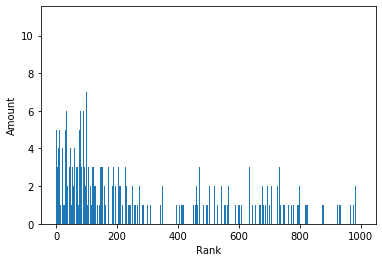

In [123]:
plt.bar(list(sorted_count.keys()), list(sorted_count.values()))
plt.xlabel('Rank')
plt.ylabel('Amount')

In [124]:
range0 = 0
range1_4 = 0
range5_9 = 0
range10_19 = 0
for i, v in list(sorted_count.items())[0:19]:
    if i == 0:
        range0 += v
    elif i>=1 and i<=4:
        range1_4 += v
    elif i>=5 and i<=9:
        range5_9 += v
    else:
        range10_19 += v
        
print(f"Top1:     {(range0 / N)*100:.2f} %")
print(f"Top2-5:   {(range1_4 / N)*100:.2f} %")
print(f"Top5-10:  {(range5_9 / N)*100:.2f} %")
print(f"Top11-20: {(range10_19 / N)*100:.2f} %")

Top1:     0.40 %
Top2-5:   1.70 %
Top5-10:  2.40 %
Top11-20: 3.20 %
